In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import bartz
from stochtree import BARTModel
from bart_playground import *

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import arviz as az
import time

INFO:arviz.preview:arviz_base not installed
INFO:arviz.preview:arviz_stats not installed
INFO:arviz.preview:arviz_plots not installed


In [4]:
from pmlb import fetch_data

X, y = fetch_data('1199_BNG_echoMonths', return_X_y=True)

In [5]:
X.shape

(17496, 9)

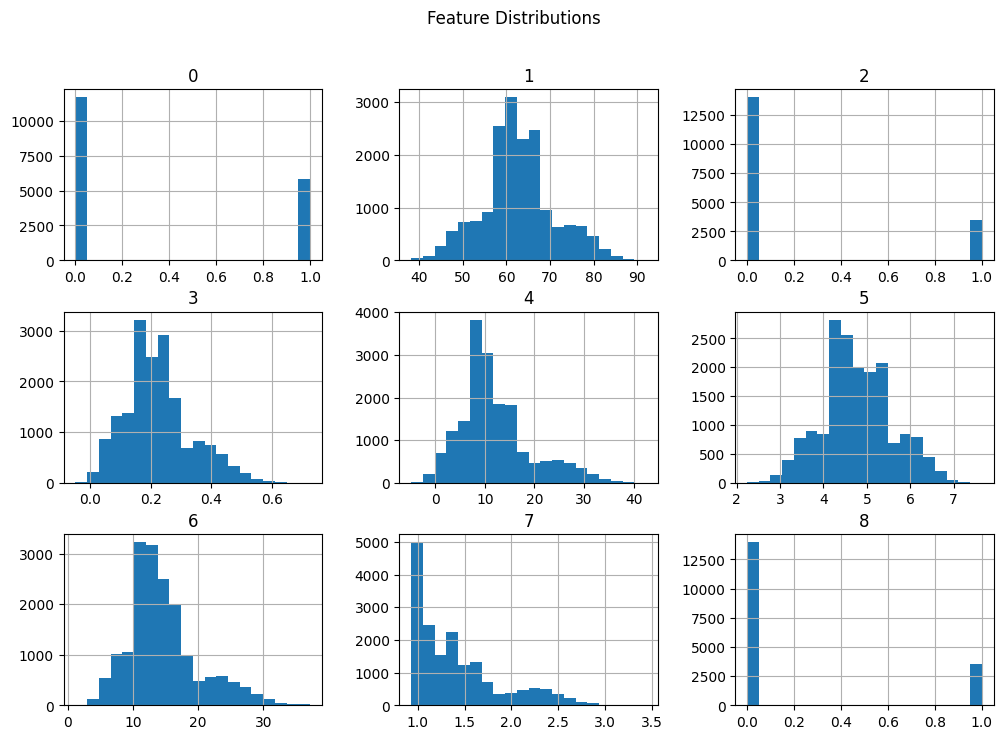

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X_df = pd.DataFrame(X)
X_df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

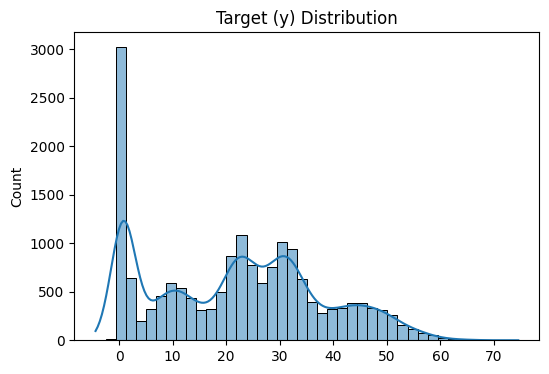

In [7]:
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True)
plt.title("Target (y) Distribution")
plt.show()

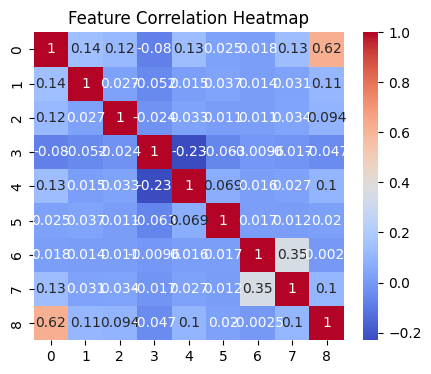

In [8]:
plt.figure(figsize=(5, 4))
corr = X_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
ndpost=1000
nskip=1000
n_trees=5

In [10]:
import comparison
import pandas as pd

rhat_df = comparison.gelman_rubin_r_compare(X, y, n_runs=10, n_chains=4, ndpost=ndpost, nskip=nskip, n_trees=n_trees, n_jobs=-2)
mean_row = pd.DataFrame([rhat_df.mean()], index=["mean"])
std_row = pd.DataFrame([rhat_df.std()], index=["std"])
rhat_df_with_stats = pd.concat([rhat_df, mean_row, std_row])
print("Gelman-Rubin R̂ comparison matrix:")
print(rhat_df_with_stats)

Gelman-Rubin R̂ comparison matrix:
      MultiBART_Rhat_Sigma2  DefaultBART_Rhat_Sigma2  MultiBART_Rhat_RMSE  \
0                  1.070196                 1.076638             2.185998   
1                  1.034541                 1.104833             1.876823   
2                  1.126920                 1.060303             2.428724   
3                  1.040078                 1.378203             1.261652   
4                  1.090673                 1.079533             1.992782   
5                  1.099147                 1.082801             1.409145   
6                  1.032813                 1.153845             1.976964   
7                  1.086995                 1.069884             1.946342   
8                  1.051063                 1.148942             1.645864   
9                  1.184282                 1.095213             2.363232   
mean               1.081671                 1.125020             1.908753   
std                0.047607              

In [11]:
rhat_df.to_csv("results/real6_echoMonths_rhat.csv", index=False)

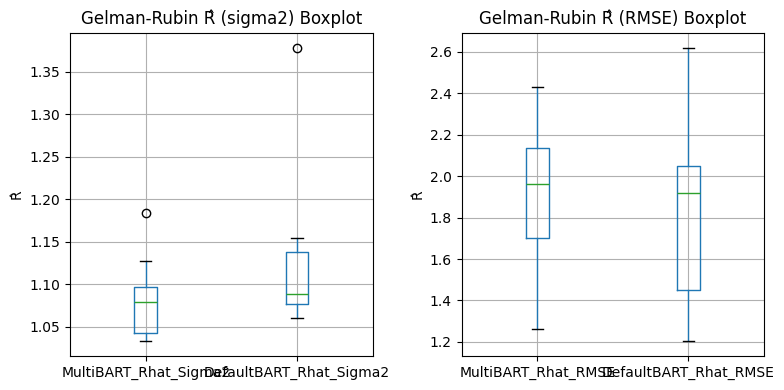

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# sigma2 boxplot
rhat_df[["MultiBART_Rhat_Sigma2", "DefaultBART_Rhat_Sigma2"]].boxplot(ax=axes[0])
axes[0].set_title("Gelman-Rubin R̂ (sigma2) Boxplot")
axes[0].set_ylabel("R̂")

# rmse boxplot
rhat_df[["MultiBART_Rhat_RMSE", "DefaultBART_Rhat_RMSE"]].boxplot(ax=axes[1])
axes[1].set_title("Gelman-Rubin R̂ (RMSE) Boxplot")
axes[1].set_ylabel("R̂")

plt.tight_layout()
plt.show()

INFO:2025-10-08 01:43:09,772:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-08 01:43:09,910:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-08 01:43:10,279:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to op

test_mse:
       bart_mtmh        bart         btz          rf         xgb
0     130.799291  133.924179  134.270973  157.244149  134.180616
1     134.670403  135.880665  137.784010  163.189999  137.421352
2     131.964988  135.154125  137.124491  157.526631  137.504599
3     133.989035  134.495649  137.795164  157.501198  137.291414
4     132.667884  135.230502  137.731727  159.932433  137.240554
5     136.786730  137.192943  137.837606  162.683852  139.567832
6     130.105853  130.913806  133.396993  156.882763  134.657008
7     137.951143  138.360608  138.170635  163.930381  140.248276
8     132.639866  135.072847  135.647487  159.649610  138.162580
9     127.145531  128.595563  130.196953  155.404314  131.881043
mean  132.872072  134.482089  135.995604  159.394533  136.815528
std     3.184392    2.855865    2.631470    2.982956    2.546753



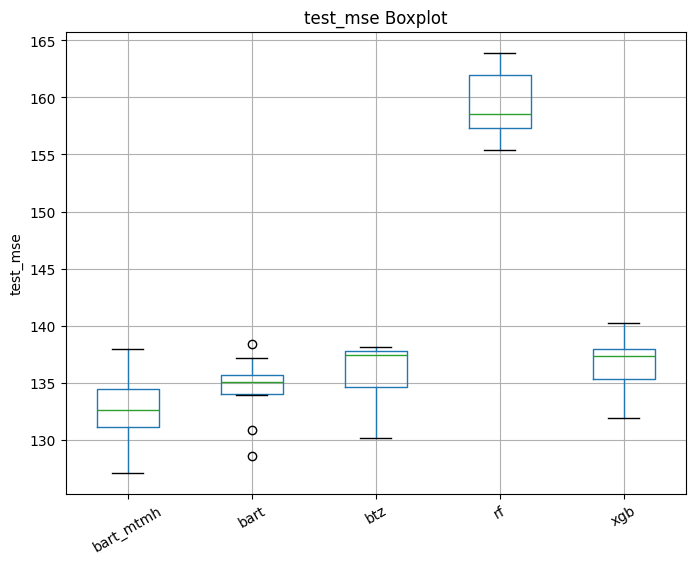

train_mse:
       bart_mtmh        bart         btz         rf         xgb
0     127.871085  131.339857  132.399384  34.459552  126.136329
1     125.763208  128.822692  133.922083  33.570017  125.972524
2     128.281778  131.302367  135.275811  34.099826  126.084856
3     127.559384  131.686640  134.211159  33.493796  126.542869
4     127.139972  132.024653  132.276021  33.979011  125.647416
5     128.054068  131.091948  133.338541  33.464728  125.139070
6     130.128243  132.144693  133.963987  33.892559  127.267555
7     126.793112  131.139928  132.199013  33.592170  125.639418
8     127.272606  130.811832  132.480693  34.171537  125.923065
9     128.012909  132.261165  134.367719  32.978704  126.780705
mean  127.687637  131.262577  133.443441  33.770190  126.113381
std     1.134094    0.985665    1.066705   0.430949    0.615571



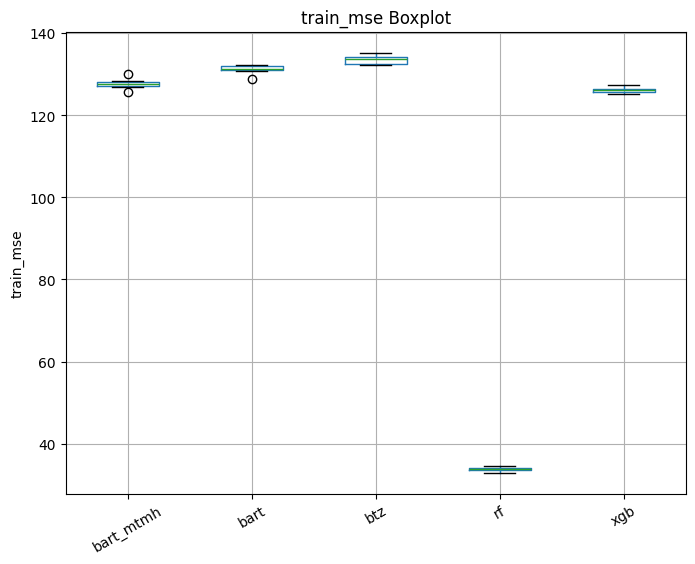

pi_length:
      bart_mtmh       bart        btz
0     44.572319  44.958200  45.664314
1     44.307790  44.710110  45.686695
2     44.606636  45.130418  45.696598
3     44.520808  45.101834  45.764153
4     44.471524  45.118684  45.699162
5     44.675171  45.015520  45.514759
6     44.910294  45.182041  45.722530
7     44.399572  44.992883  45.524590
8     44.424916  44.912945  45.380581
9     44.642555  45.264832  45.901524
mean  44.553159  45.038747  45.655491
std    0.170490   0.157544   0.146817



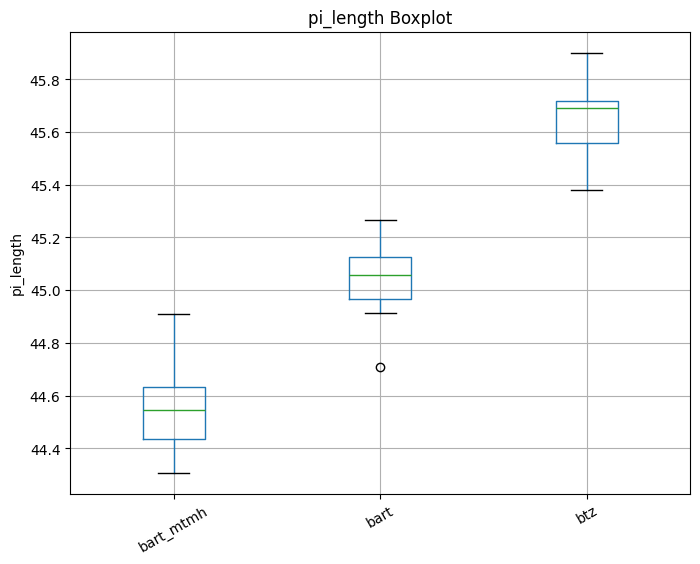

coverage:
      bart_mtmh      bart       btz
0      0.940101  0.940786  0.944673
1      0.934156  0.938729  0.943530
2      0.939643  0.940329  0.946502
3      0.939415  0.942158  0.945588
4      0.938500  0.943987  0.946273
5      0.934842  0.939415  0.941015
6      0.948331  0.946045  0.947417
7      0.934156  0.939186  0.944216
8      0.937586  0.939643  0.939872
9      0.947645  0.949931  0.949017
mean   0.939438  0.942021  0.944810
std    0.005035  0.003626  0.002807



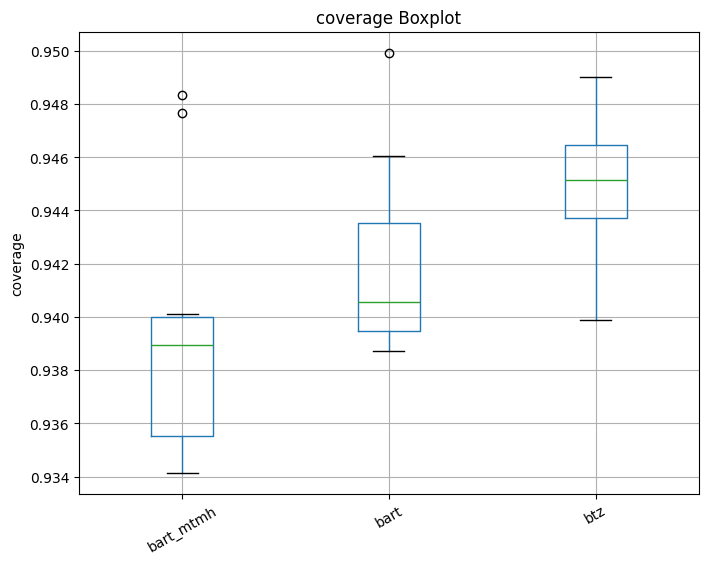

train_time:
      bart_mtmh      bart        btz        rf       xgb
0     31.544115  3.864203  20.865653  0.945669  0.103628
1     29.998860  4.152187  16.674578  0.604905  0.064296
2     29.734408  3.896499  18.083202  0.853460  0.092630
3     29.491766  3.795986  15.418110  0.943317  0.114493
4     29.112110  3.926910  16.481249  0.986879  0.398060
5     29.217768  3.776982  16.211512  1.048162  0.620139
6     29.480137  4.222902  17.721487  0.860379  0.092847
7     29.758234  3.908329  17.482431  0.875849  0.090461
8     28.569122  3.896139  15.923202  0.996558  0.103606
9     28.408500  3.820167  15.967624  0.919613  0.106251
mean  29.531502  3.926030  17.082905  0.903479  0.178641
std    0.870980  0.147391   1.582036  0.122224  0.182357



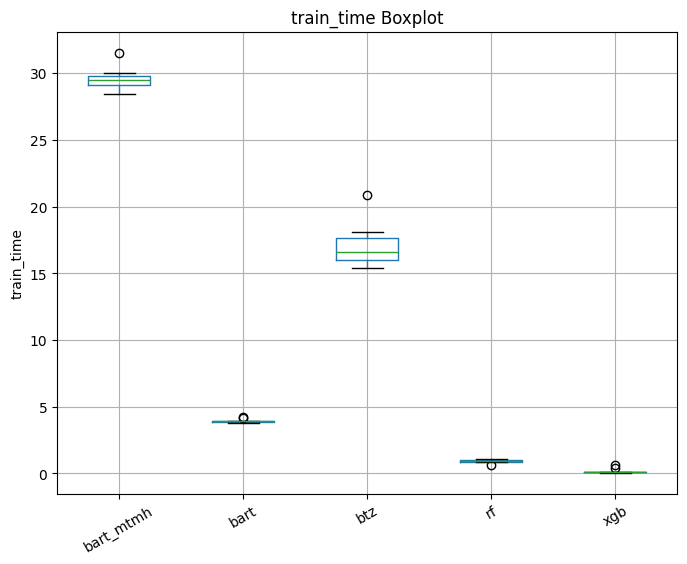

In [13]:
import matplotlib.pyplot as plt
import comparison
import pandas as pd

mse_results = comparison.bart_mse_comparison(X, y, n_runs=10, n_skip=nskip, n_post=ndpost, n_trees=n_trees, n_jobs=-2)
for k, v in mse_results.items():
    mean_row = pd.DataFrame([v.mean()], index=["mean"])
    std_row = pd.DataFrame([v.std()], index=["std"])
    v_with_stats = pd.concat([v, mean_row, std_row])
    print(f"{k}:\n{v_with_stats}\n")
    
    plt.figure(figsize=(8, 6))
    v.boxplot()
    plt.title(f"{k} Boxplot")
    plt.ylabel(k)
    plt.xticks(rotation=30)
    plt.show()

In [14]:
for k, v in mse_results.items():
    csv_name = f"results/real6_echoMonths_{k}.csv"
    v.to_csv(csv_name, index=False)

## Multi-tries

In [15]:
from multi_tries import multi_tries_performance
import pandas as pd

csv_path = "results/real6_echoMonths_tries.csv"
existing_df = None

if os.path.exists(csv_path):
    existing_df = pd.read_csv(csv_path)

df = multi_tries_performance(
    X, y,
    multi_tries_list=[1,5,10,50,100],
    n_runs=10, n_chains=4,
    ndpost=ndpost, nskip=nskip, n_trees=n_trees, n_jobs=-2
)

if existing_df is not None:
    df = pd.concat([existing_df, df], ignore_index=True)
    df = df.sort_values(by='multi_tries', ascending=True).reset_index(drop=True)

df.to_csv("results/real6_echoMonths_tries.csv", index=False)

In [16]:
print(df)

   multi_tries  Rhat_Sigma2  Rhat_RMSE    Test_MSE  Coverage  Train_Time
0            1     1.139017   2.113758  134.621440  0.941107    8.419613
1            5     1.135978   2.203070  133.691607  0.939872   17.541189
2           10     1.081671   1.908753  132.344365  0.941404   27.883669
3           50     1.088629   1.658145  131.266381  0.939186  108.176423
4          100     1.140767   1.693991  131.549079  0.939118  203.521455
